In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#import matplotlib.pyplot as plt
#nltk.downloader.download('vader_lexicon')

In [2]:
# Authentication
consumerKey = "yo3xDeJbAxM5TTWSryUFalDR2"
consumerSecret = "5cOcpYDmuIFAxSuntuyVCnpxTETAyU0Dpyggx9lcQbuSCb5AAE"
accessToken = "1400338445982003203-1hcHkOFOTDMCa0UxTT3QVqa7zcKz0g"
accessTokenSecret = "jAwlCs3KqBNwgztBJBZ46aQ685WoujmaJSgGnfHpdVbP4"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Masukkan kata kunci: ")
noOfTweet = int(input ("Berapa banyak tweet yang akan dianalisa: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print('done')

Masukkan kata kunci: VaksinasiCovid19
Berapa banyak tweet yang akan dianalisa: 1500
done


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1500
positive number:  77
negative number:  29
neutral number:  1394


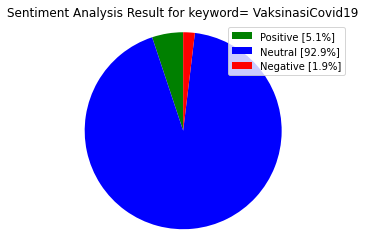

In [5]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [6]:
tweet_list.drop_duplicates(inplace = True)

In [7]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Partisi bilik vaksinasi dengan berbagai ukuran...,Partisi bilik vaksinasi dengan berbagai ukuran...
1,Update data vaksinasi COVID-19 di Kabupaten Ro...,Update data vaksinasi COVID-19 di Kabupaten Ro...
2,RT @TelekungSK: “Nak... Mak teringin nak cucuk...,RT @TelekungSK: “Nak... Mak teringin nak cucuk...
3,Come on vaccinated vaccinated!\n#VaksinasiCovi...,Come on vaccinated vaccinated!\n#VaksinasiCovi...
4,Top News Koran Rakyat Merdeka\n\nWarning Polit...,Top News Koran Rakyat Merdeka\n\nWarning Polit...
...,...,...
1495,Pemuda Indonesia Di Balik Pembuatan Vaksin Cov...,Pemuda Indonesia Di Balik Pembuatan Vaksin Cov...
1496,Laju gila cucuk 2nd dose ni. 5minit dah siap c...,Laju gila cucuk 2nd dose ni. 5minit dah siap c...
1497,Tiga Provinsi di Pulau Jawa jadi fokus percepa...,Tiga Provinsi di Pulau Jawa jadi fokus percepa...
1498,#VaksinasiCovid19 #talkshow https://t.co/Yn3ct...,#VaksinasiCovid19 #talkshow https://t.co/Yn3ct...


In [8]:
tweet_list

,0,text
0,Partisi bilik vaksinasi dengan berbagai ukuran...,Partisi bilik vaksinasi dengan berbagai ukuran...
1,Update data vaksinasi COVID-19 di Kabupaten Ro...,Update data vaksinasi COVID-19 di Kabupaten Ro...
2,RT @TelekungSK: “Nak... Mak teringin nak cucuk...,RT @TelekungSK: “Nak... Mak teringin nak cucuk...
3,Come on vaccinated vaccinated!\n#VaksinasiCovi...,Come on vaccinated vaccinated!\n#VaksinasiCovi...
4,Top News Koran Rakyat Merdeka\n\nWarning Polit...,Top News Koran Rakyat Merdeka\n\nWarning Polit...
...,...,...
1495,Pemuda Indonesia Di Balik Pembuatan Vaksin Cov...,Pemuda Indonesia Di Balik Pembuatan Vaksin Cov...
1496,Laju gila cucuk 2nd dose ni. 5minit dah siap c...,Laju gila cucuk 2nd dose ni. 5minit dah siap c...
1497,Tiga Provinsi di Pulau Jawa jadi fokus percepa...,Tiga Provinsi di Pulau Jawa jadi fokus percepa...
1498,#VaksinasiCovid19 #talkshow https://t.co/Yn3ct...,#VaksinasiCovid19 #talkshow https://t.co/Yn3ct...


In [9]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Partisi bilik vaksinasi dengan berbagai ukuran...,partisi bilik vaksinasi dengan berbagai ukuran...
1,Update data vaksinasi COVID-19 di Kabupaten Ro...,update data vaksinasi covid 19 di kabupaten ro...
2,RT @TelekungSK: “Nak... Mak teringin nak cucuk...,nak mak teringin nak cucuk vaksin vak...
3,Come on vaccinated vaccinated!\n#VaksinasiCovi...,come on vaccinated vaccinated vaksinasicovid...
4,Top News Koran Rakyat Merdeka\n\nWarning Polit...,top news koran rakyat merdeka warning politis...
5,"Antrian #VaksinasiCovid19 1, di @1_samsat yan...",antrian vaksinasicovid19 1 di samsat yang...
6,#VaksinasiCovid19 di Indonesia efektif melawan...,vaksinasicovid19 di indonesia efektif melawan...
7,Ayo Kita Vaksin....\nLindungi diri dan keluarg...,ayo kita vaksin lindungi diri dan keluarga...
8,RT @SinarOnline: Malaysia turut tidak terkecua...,malaysia turut tidak terkecuali terpalit dala...
9,Sentra Vaksinasi Akan Digelar di Stadion Wibaw...,sentra vaksinasi akan digelar di stadion wibaw...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Partisi bilik vaksinasi dengan berbagai ukuran...,partisi bilik vaksinasi dengan berbagai ukuran...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,Update data vaksinasi COVID-19 di Kabupaten Ro...,update data vaksinasi covid 19 di kabupaten ro...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
2,RT @TelekungSK: “Nak... Mak teringin nak cucuk...,nak mak teringin nak cucuk vaksin vak...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,Come on vaccinated vaccinated!\n#VaksinasiCovi...,come on vaccinated vaccinated vaksinasicovid...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
4,Top News Koran Rakyat Merdeka\n\nWarning Polit...,top news koran rakyat merdeka warning politis...,0.5,0.5,negative,0.132,0.769,0.099,-0.1531
5,"Antrian #VaksinasiCovid19 1, di @1_samsat yan...",antrian vaksinasicovid19 1 di samsat yang...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
6,#VaksinasiCovid19 di Indonesia efektif melawan...,vaksinasicovid19 di indonesia efektif melawan...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,Ayo Kita Vaksin....\nLindungi diri dan keluarg...,ayo kita vaksin lindungi diri dan keluarga...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,RT @SinarOnline: Malaysia turut tidak terkecua...,malaysia turut tidak terkecuali terpalit dala...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,Sentra Vaksinasi Akan Digelar di Stadion Wibaw...,sentra vaksinasi akan digelar di stadion wibaw...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [13]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1055,91.03
positive,71,6.13
negative,33,2.85


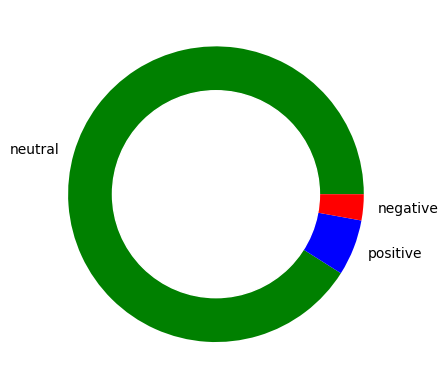

In [14]:
# create data for Pie Chart
import pc

pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
#plt.pie(size=[percentage],colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_all.png")
    print("Word Cloud Saved Successfully")
    path="wc_all.png"
    display(Image.open(path))

Word Cloud Saved Successfully


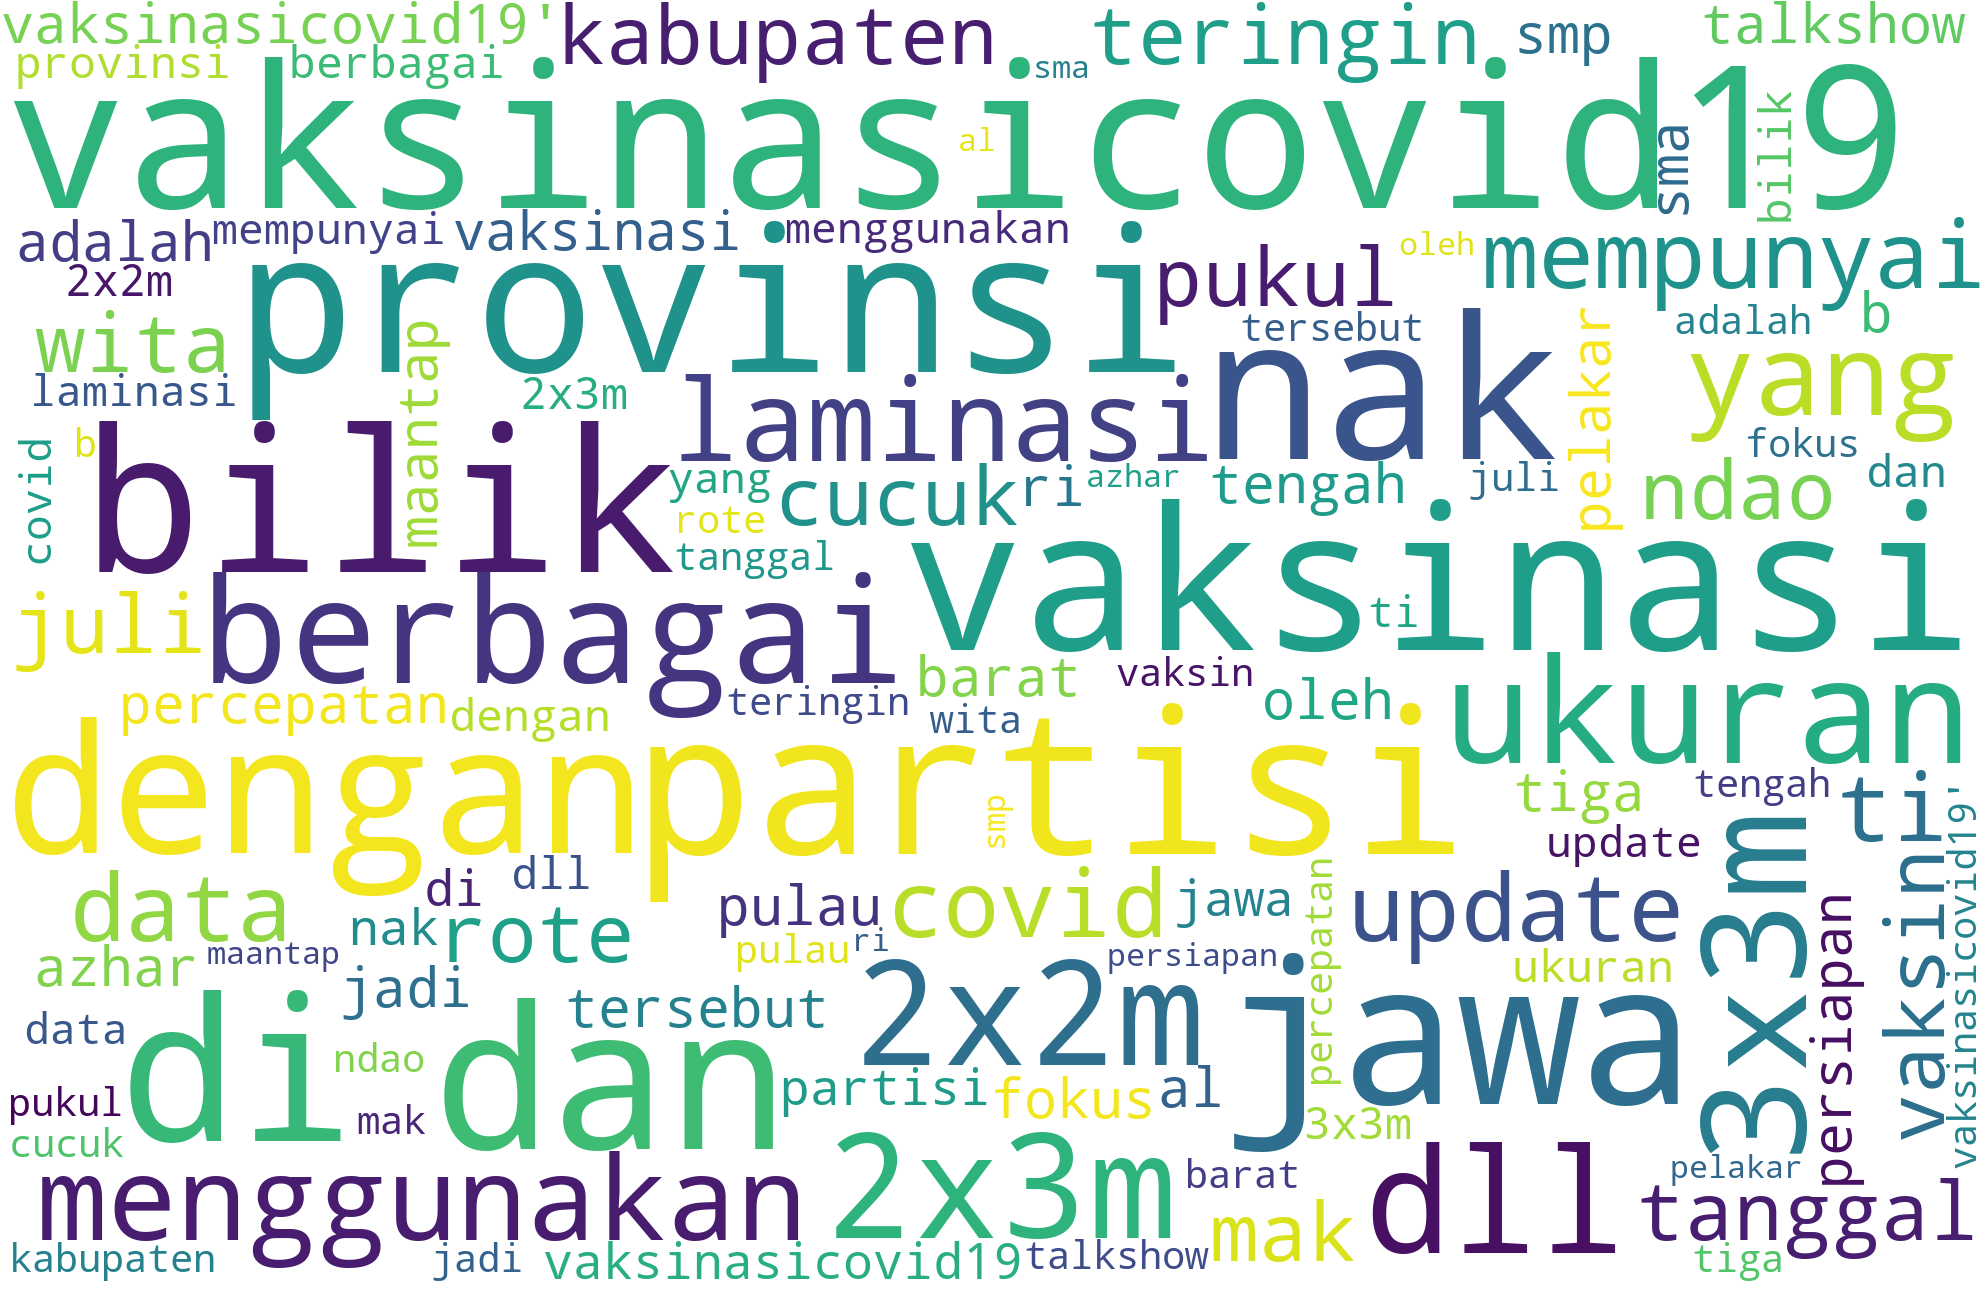

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [17]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_positive.png")
    print("Word Cloud Saved Successfully")
    path="wc_positive.png"
    display(Image.open(path))

Word Cloud Saved Successfully


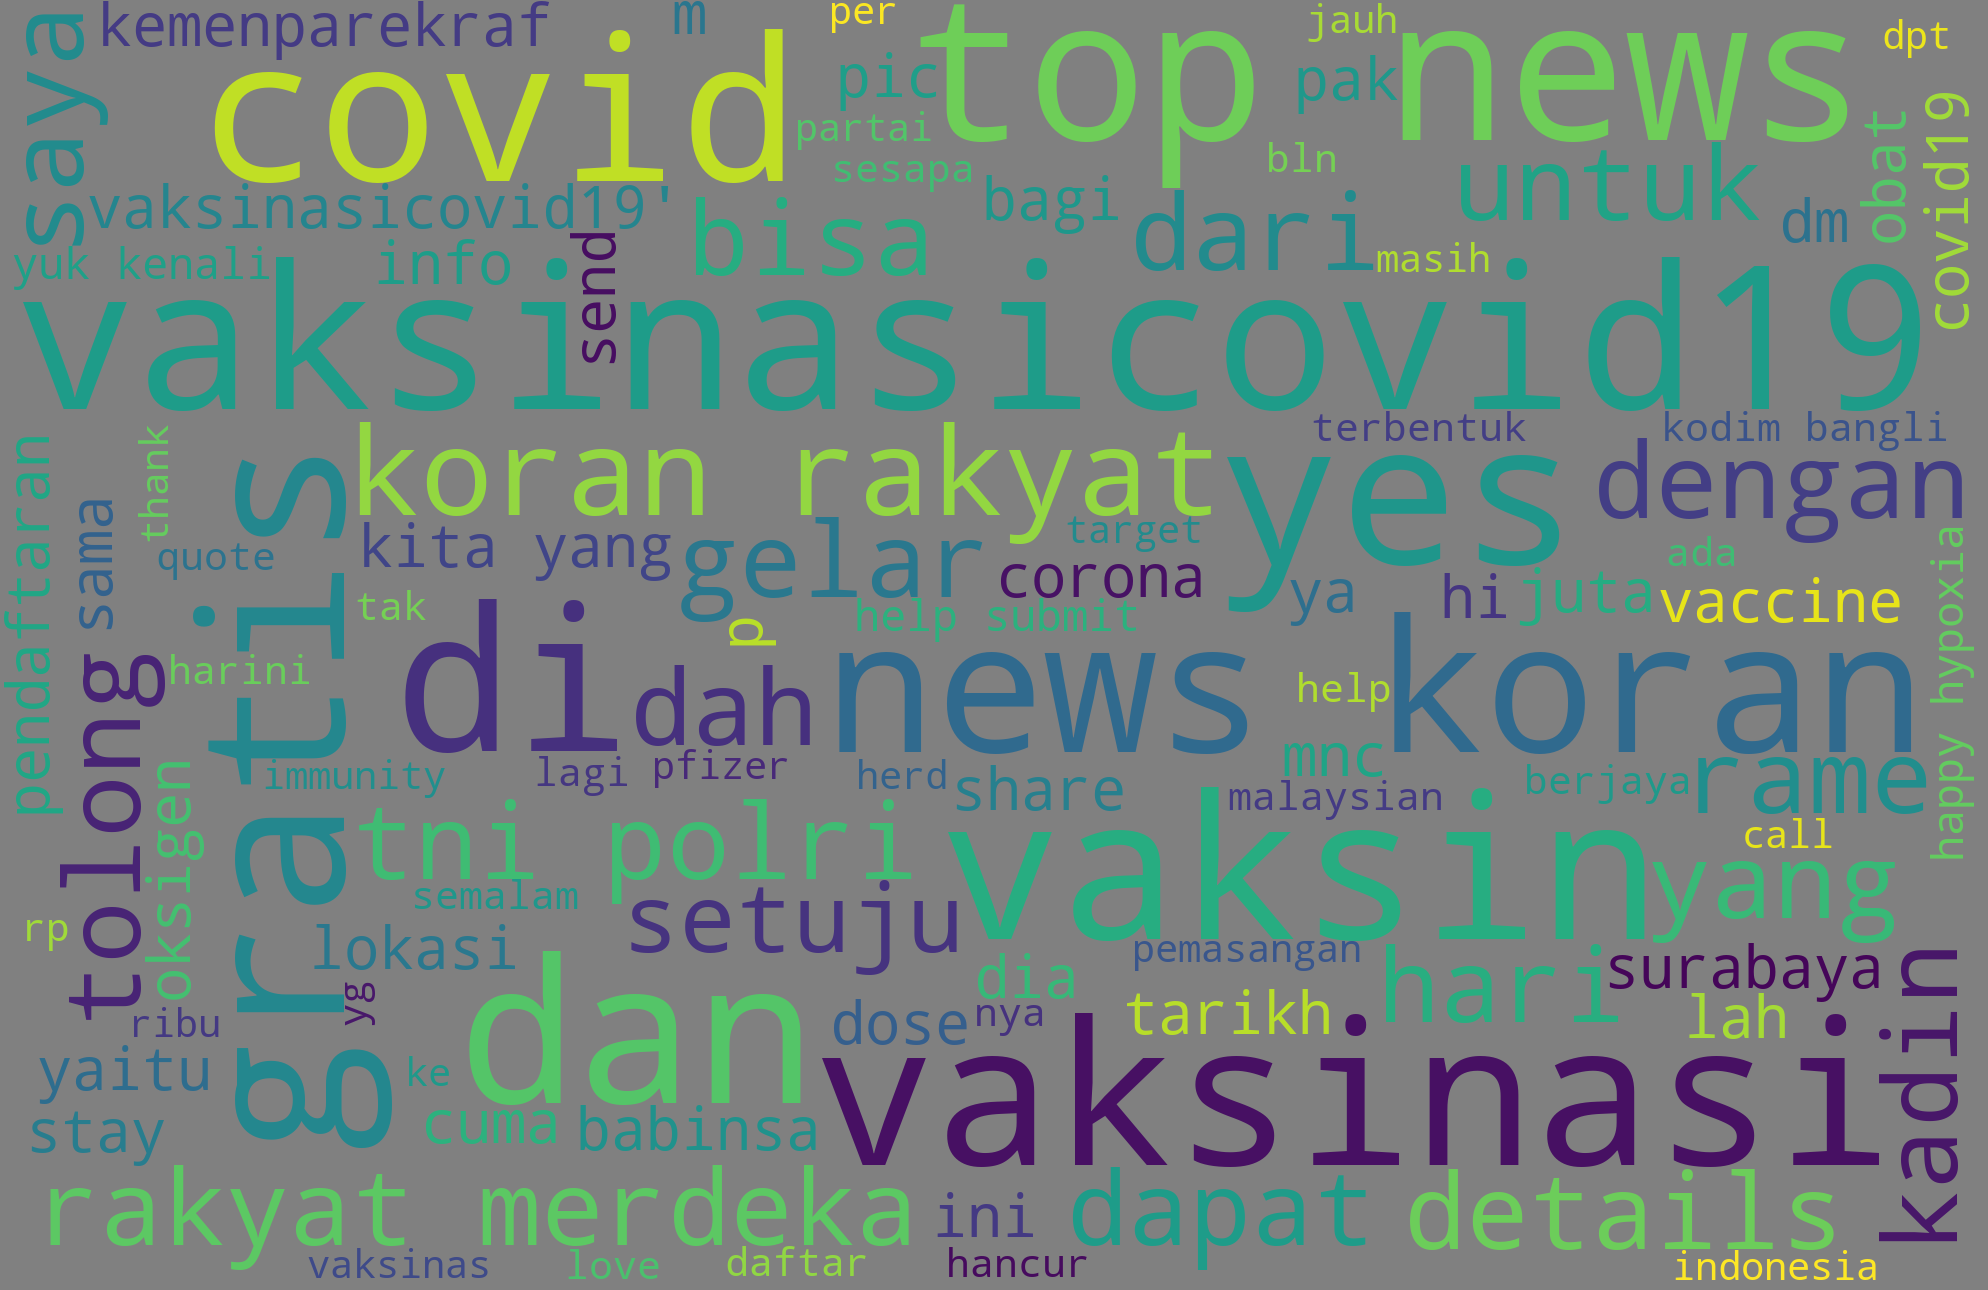

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

In [19]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_negative.png")
    print("Word Cloud Saved Successfully")
    path="wc_negative.png"
    display(Image.open(path))

Word Cloud Saved Successfully


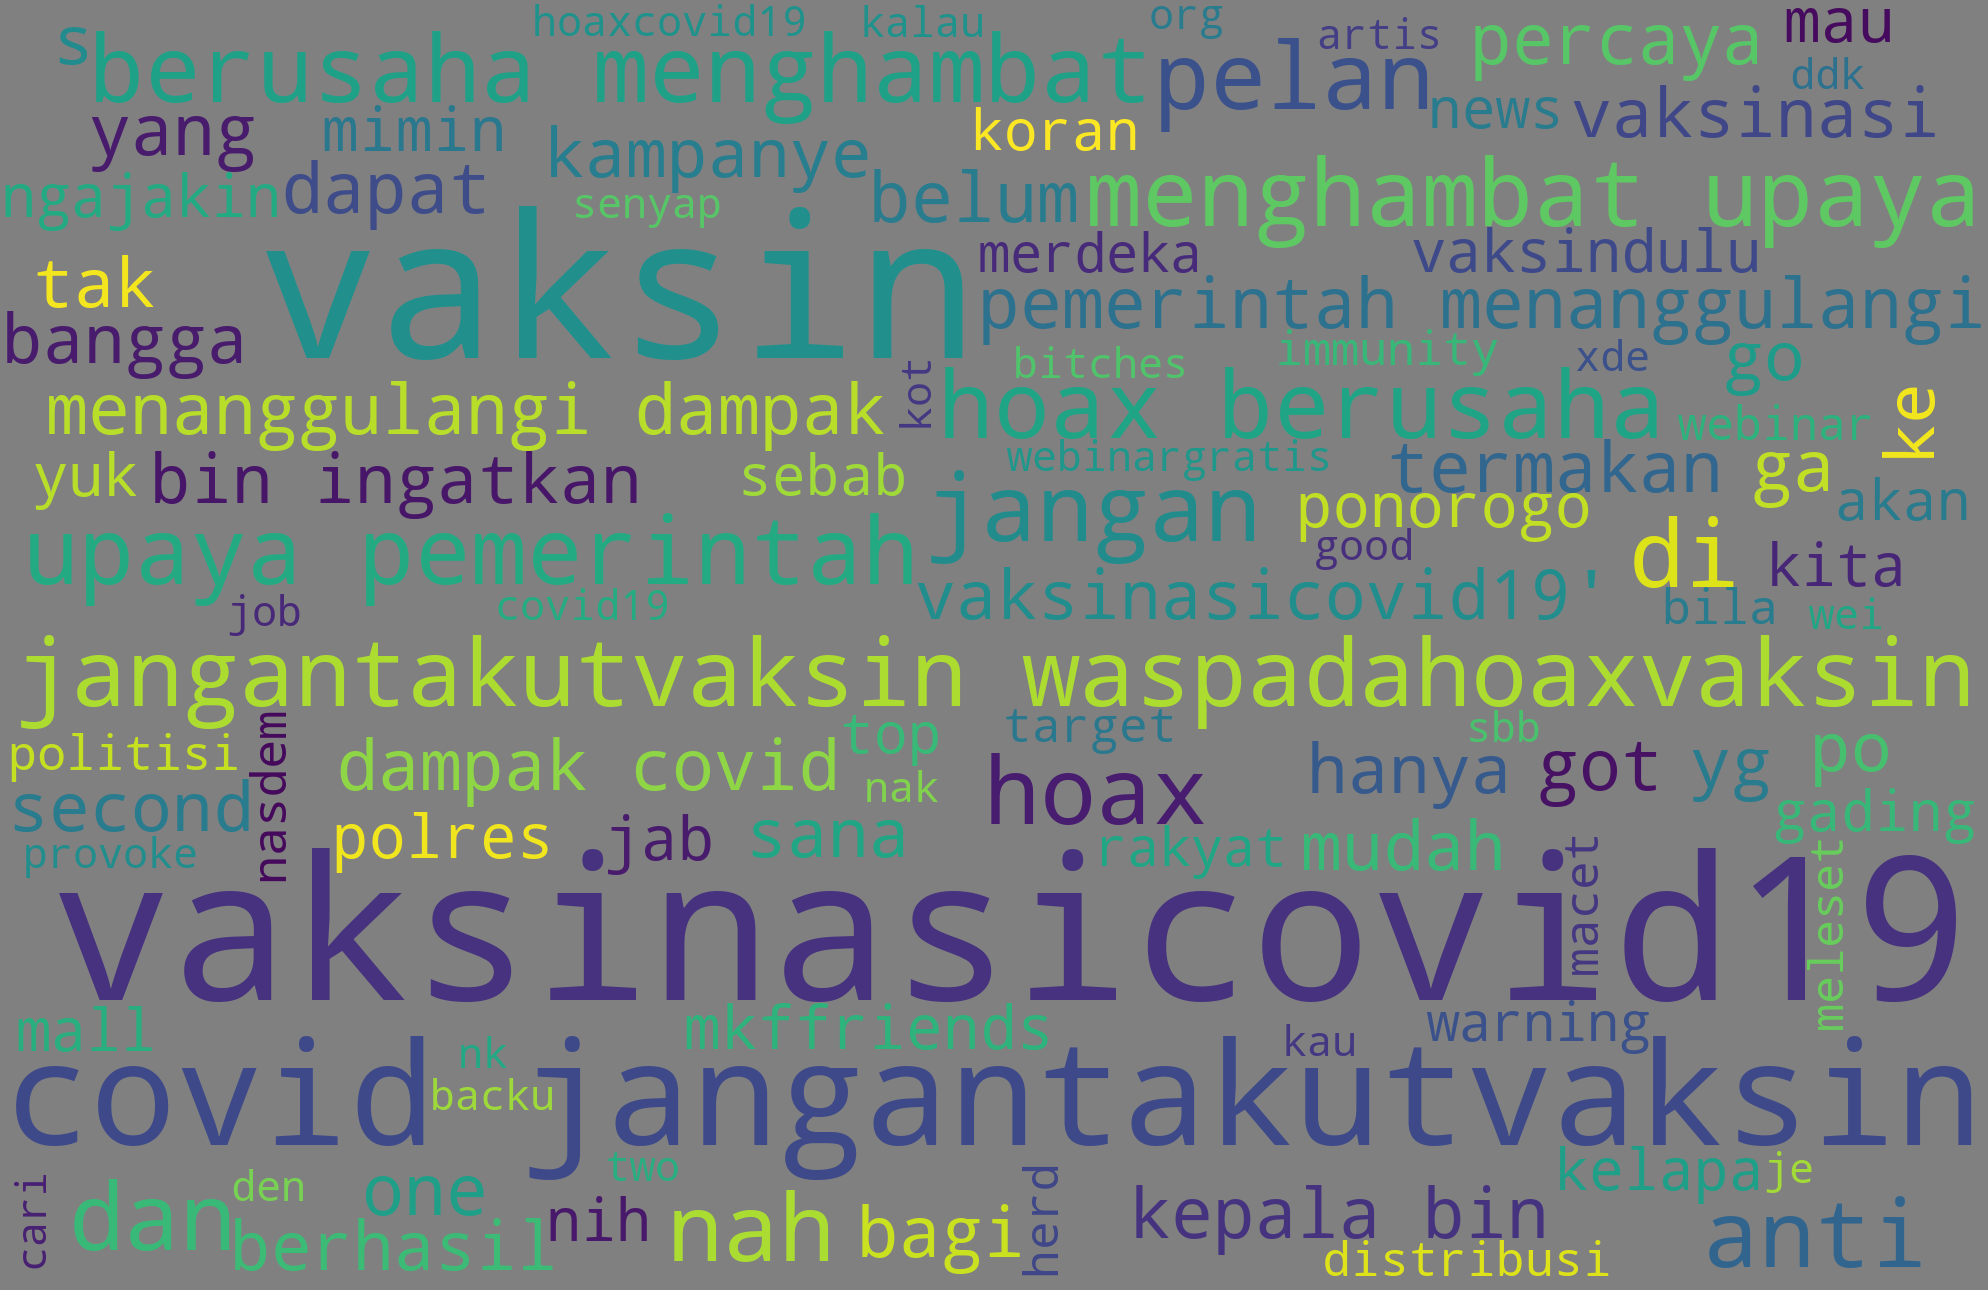

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [21]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_neutral.png")
    print("Word Cloud Saved Successfully")
    path="wc_neutral.png"
    display(Image.open(path))

Word Cloud Saved Successfully


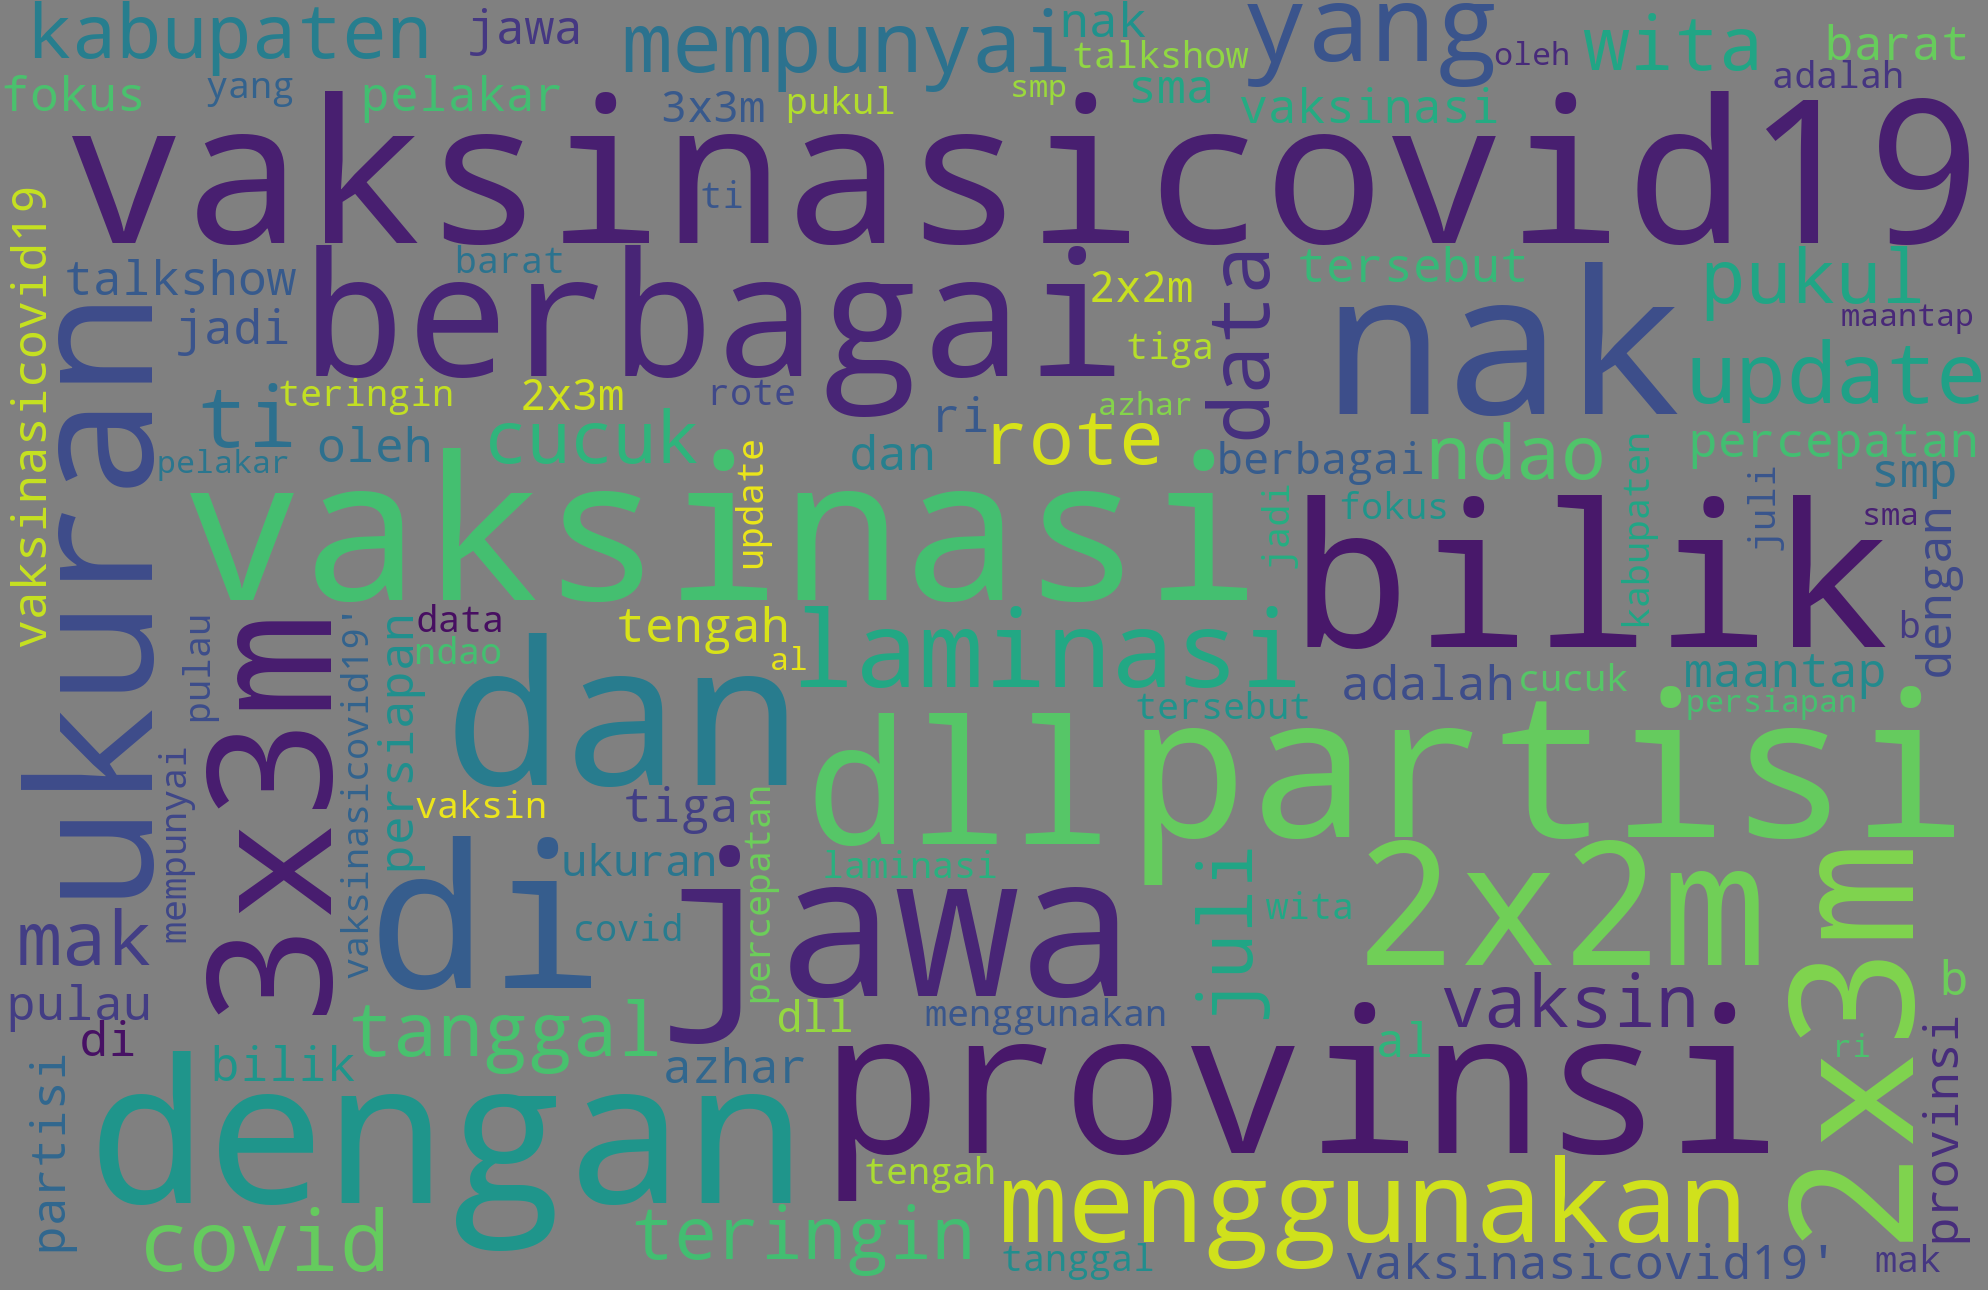

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [23]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [24]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,104.64
neutral,100.50
positive,104.77


In [25]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.52
neutral,12.99
positive,14.66


In [26]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [27]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [28]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [29]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [30]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [31]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Partisi bilik vaksinasi dengan berbagai ukuran...,partisi bilik vaksinasi dengan berbagai ukuran...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,118,16,partisi bilik vaksinasi dengan berbagai ukuran...,"[partisi, bilik, vaksinasi, dengan, berbagai, ...","[partisi, bilik, vaksinasi, dengan, berbagai, ...","[partisi, bilik, vaksinasi, dengan, berbagai, ..."
1,Update data vaksinasi COVID-19 di Kabupaten Ro...,update data vaksinasi covid 19 di kabupaten ro...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,114,18,update data vaksinasi covid di kabupaten rote...,"[update, data, vaksinasi, covid, di, kabupaten...","[update, data, vaksinasi, covid, di, kabupaten...","[updat, data, vaksinasi, covid, di, kabupaten,..."
2,RT @TelekungSK: “Nak... Mak teringin nak cucuk...,nak mak teringin nak cucuk vaksin vak...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,59,7,nak mak teringin nak cucuk vaksin vak...,"[, nak, mak, teringin, nak, cucuk, vaksin, vak...","[, nak, mak, teringin, nak, cucuk, vaksin, vak...","[, nak, mak, teringin, nak, cucuk, vaksin, vak..."
3,Come on vaccinated vaccinated!\n#VaksinasiCovi...,come on vaccinated vaccinated vaksinasicovid...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,58,6,come on vaccinated vaccinated vaksinasicovid...,"[come, on, vaccinated, vaccinated, vaksinasico...","[come, vaccinated, vaccinated, vaksinasicovid,...","[come, vaccin, vaccin, vaksinasicovid, vaksin, ]"
4,Top News Koran Rakyat Merdeka\n\nWarning Polit...,top news koran rakyat merdeka warning politis...,0.5,0.5,negative,0.132,0.769,0.099,-0.1531,115,16,top news koran rakyat merdeka warning politis...,"[top, news, koran, rakyat, merdeka, warning, p...","[top, news, koran, rakyat, merdeka, warning, p...","[top, news, koran, rakyat, merdeka, warn, poli..."


In [32]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1159 Number of reviews has 3196 words


In [33]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,abah,abang,abi,abubakar,abv,accomplish,aceh,acehtengah,...,yukkk,yunani,yustisi,z,zahwani,zaki,zaman,zeneca,zer,zonk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
vaksin,505
vaksinasicovid,469
vaksinasi,383
covid,292
di,277
dan,191
yang,154
untuk,123
ini,101
dengan,76


In [35]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),5)

n2_bigrams

[('covid 19', 208),
 ('vaksinasi covid', 77),
 ('juli 2021', 54),
 ('vaksin vaksinasicovid19', 54),
 ('gerai vaksin', 50)]

In [37]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),5)

n3_trigrams

[('vaksinasi covid 19', 72),
 ('gerai vaksin presisi', 48),
 ('covid 19 di', 36),
 ('vaksin covid 19', 32),
 ('hadiri gerai vaksin', 28)]